# Práctica 1
# Perceptrón multicapa con Keras

José Luis Ruiz Reina <br> Fernando Sancho Caparrini <br> Miguel A. Martínez del Amor <br>Miguel A. Gutiérrez Naranjo

_Versión del 13 de marzo de 2022_

 En esta práctica vamos a realizar algunos ejercicios simples con perceptrones multicapa (MLP) que nos van a servir de introducción al entorno de trabajo de Deep Learning con keras. Algunas consideraciones previas:
 
 * Se recomienda usar Anaconda y crear un entorno (environment) diferente para cada proyecto
 * En particular, se recomienda crea un entorno para usar tensorflow 1.x y otro para tensorflow 2.x. El código de esta práctica corresponde a tensorflow 2.x
 * Si se dispone de un GPU local, debe ser suficiente para esta práctica. En otro caso, se puede subir este archivo a Google Drive y ejecutarlo en Google Colab.

*Keras* es una biblioteca Python que proporciona una interfaz para trabajar de manera cómoda y eficiente con redes neuronales y *Deep Learning* en general. Su desarrollo se realizó de manera independiente, pero actualmente está integrada en tensorflow 2.x.
*Tensorflow* es una biblioteca para Deep Learning, desarrollada por Google desde 2017, que permite construir y entrenar modelo basados en redes neuronales de manera muy eficiente. *Keras* nos proporciona una interfaz a *Tensorflow* de más alto nivel que si operáramos directamente con los métodos y estructuras de datos de *Tensorflow*.    

En Keras hay dos modos de representar las redes
* Secuential API
* Functional API

Empezamos con un experimento de Secuential API. Al final de la práctica veremos uno con la API funcional.

In [11]:
# Importamos tensorflow y vemos qué versión estamos usando
import tensorflow as tf
print(tf.__version__)

2.8.0


In [12]:
# Comprobamos que realmente estamos usando la GPU
tf.config.experimental.list_physical_devices('GPU') 

[]

Comenta la siguiente celda si no estás en Google Colab

In [13]:
# Para usar tu Drive de Google para almacenar ficheros que vas a usar en Google Colab

from google.colab import drive
drive.mount ('/content/drive')

# Cambia la línea siguiente y pon tu directorio de trabajo
%cd '/content/drive/MyDrive/AP_2022'

# Comprobamos qur todo ha ido bien pidiendo a Google Colab que nos diga qué fichero hay en el directorio
!ls

ModuleNotFoundError: No module named 'google.colab'

# Experimento 1

Este experimento está principamente basado en un ejemplo del capítulo 10 del libro:
 
**Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition**   
_Aurélien Géron_   
O'Reilly Media, Inc. 2019   

In [14]:
import numpy as np
from tensorflow import keras

In [15]:
# Comprobamos qué versión de keras estamos usando
print(keras.__version__)

2.8.0


El conjunto de datos que vamos a tratar es *Fashion MNIST*, consistente en 70000 imágenes de distintos tipos de calzado y ropa, clasificados en 10 posibles clases. Las imágenes tienen un tamaño de 28x28 pixeles, cada uno de ellos codificado en escala de grises (de 0 a 255). Puedes tener más información de este conjunto de datos en https://github.com/zalandoresearch/fashion-mnist




En *Keras* tenemos una herramienta para cargar las imágenes directamente, con 60000 imágenes como conjunto de entrenamiento y 10000 en el conjunto de test:


In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_fashion, y_train_full_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

Para poder tratar este conjunto de datos con redes neuronales, debemos tener en cuenta el formato de los datos:
* Cada ejemplo es bidimensional (28x28). 
* Las intensidades de los píxeles vienen dadas por números enteros.  

In [17]:
# El conjunto X_train_full es un tensor. Puedes imaginártelo como la superposición de 
# 60000 matrices 28 x 28, donde en cada matriz, cada número representa la intensidad del píxel 

print(X_train_full_fashion.shape)
print(X_test_fashion.shape)
print(y_train_full_fashion.shape)
print(y_test_fashion.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [18]:
# Podemos ver que el tipo de dato (dtype) de este dataset es "unsigned integer 8-bits"
print(X_train_full_fashion.dtype)
print(y_train_full_fashion.dtype)

uint8
uint8


En el desarrollo de este ejemplo, como ya veremos,  nos será util tener un conjunto de validación. Este conjunto de validación puede verse como una porción del conjunto de entrenamiento sobre la que vamos a tomar medidas durante el proceso de entrenamiento. Nos quedamos con 55000 ejemplos en el conjunto de entrenamiento y 5000 para validación. Además, vamos a normalizar la intensidad de gris a un número entre 0 y 1, dividiendo por 255:   

In [19]:
X_valid_fashion, X_train_fashion = X_train_full_fashion[:5000] / 255., X_train_full_fashion[5000:] / 255.
y_valid_fashion, y_train_fashion = y_train_full_fashion[:5000], y_train_full_fashion[5000:]
X_test_fashion = X_test_fashion / 255.

In [20]:
# Podemos ver los datos de la matiz que representan la primera imagen
X_train_fashion[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

Conocer los valores numéricos de la matriz no nos dice mucho. Representamos esa matriz como una imagen. 

In [21]:
import matplotlib.pyplot as plt

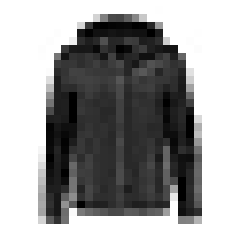

In [22]:
plt.imshow(X_train_fashion[0], cmap="binary")
plt.axis('off')
plt.show()

Las clases se codifican de 0 a 9, correspondiendo cada dígito a una de las clases que aparecen a continuación: 

In [23]:
y_train_fashion

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [24]:
y_train_fashion[0]

4

In [25]:
# Definimos el nombre el castellano que le queremos dar a cada uno de esos valores de clasificación

class_names = ["Camiseta", "Pantalón", "Chaleco", "Traje", "Abrigo",
               "Sandalia", "Camisa", "Zapatilla", "Bolso", "Botas"]

Podemos probar con varias imágenes

La clase de la imagen 347 es 6 y la llamamos Camisa


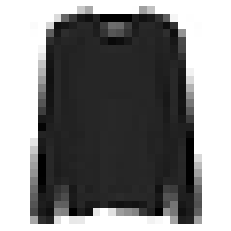

In [26]:
n_i = 347

print('La clase de la imagen',n_i,'es',y_train_fashion[n_i],'y la llamamos',class_names[y_train_fashion[n_i]])

plt.imshow(X_train_fashion[n_i], cmap="binary")
plt.axis('off')
plt.show()

Con el siguiente código podemos ver una pequeña muestra de las imágenes de las que consta el conjunto de datos:

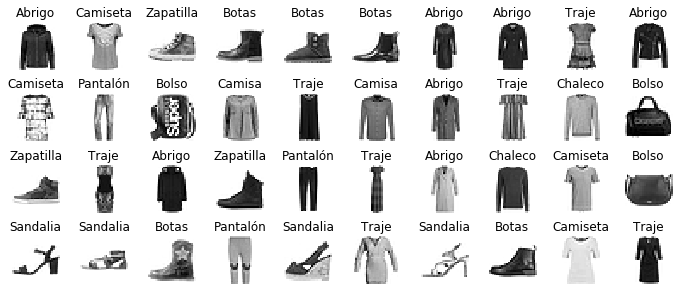

In [27]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_fashion[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_fashion[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Vamos a construir una red neuronal usando el módulo `Sequential` (también conocido como `Sequential` API). Para ello, simplemente creamos el modelo y añadimos capas (*layers*), indicando el tipo, el número de unidades y la función de activación: 

In [28]:
model_fashion = keras.models.Sequential()
model_fashion.add(keras.layers.Flatten(input_shape=[28, 28]))
model_fashion.add(keras.layers.Dense(300, activation="relu"))
model_fashion.add(keras.layers.Dense(100, activation="relu"))
model_fashion.add(keras.layers.Dense(10, activation="softmax"))

Comentemos en más detalles cada una de las capas:

* La primera capa (la de entrada), es una capa de tipo `Flatten` que nos va a servir para "aplanar" los ejemplos bidimensionales (28x28) en ejemplos unidimensionales (784). Esta capa se limita a realizar un `X.reshape(-1,1)` a cada ejemplo `X` de entrada. Podemos considerar por tanto que tenemos 784 unidades en la capa de entrada. 
* Las dos capas siguientes son de tipo `Dense`, una con 300 unidades y la siguiente con 100 unidades, con función de activación ReLU. Cada unidad en una capa de tipo `Dense` recibe tantas conexiones como unidades en la capa anterior, más un sesgo. 
* En la útima capa (la de salida), tenemos 10 unidades (una por valor de clasificación), con función de activación softmax. Por tanto, debemos interpretar la salida de cada unidad como la probabilidad de pertenecer a la correspondiente clase.    

Una vez construido el modelo, el atributo `layers` será una lista con las correspondientes capas. Sin embargo, si consultamos su valor lo que obtenemos por pantalla no sirve de mucho. 

In [29]:
model_fashion.layers

Es mejor usar `summary`:

In [30]:
model_fashion.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Para cada capa, se nos muestra:

* El tipo de la capa (flatten y densas, en este caso).
* El número de unidades de salida de cada capa (aquí `None` significa que puede recibir un número indeterminado de ejemplos)
* El número de _parámetros_. Aquí por parámetro entendemos tanto pesos ($w$) como sesgos (bias, $b$). Veamos por qué tenemos esa cantidad de parámetros en cada capa:
   - La capa de entrada, por definición, no tiene parámetros (sólo se encarga de recoger los datos de entrada).
   - La primera capa oculta tiene 300 unidades y cada una recibe 784 conexiones y además hay que sumar los 300 sesgos: $300 \times 784+300=235500$
   - La siguiente capa oculta es de 100 unidades. Por tanto son $300 \times 100+100=30100$ parámetros
   - Por último, la capa de salida tiene $100 \times 10+10=1010$ 
   
En total son 266610 parametros. 

Podemos explorar los pesos iniciales y los sesgos, mediante `get_weights`. Por ejemplo, de la primera capa oculta (`layers[1]`) obtenemos los arrays de pesos y bias:

In [31]:
[weights1, biases1] = model_fashion.layers[1].get_weights()

Podemos ver el tamaño de cada uno de estos arrays:

In [32]:
weights1.shape, biases1.shape

((784, 300), (300,))

Podemos ver los pesos iniciales. Recuerda que son aleatorios. Puedes aprender más sobre cómo se generan estos pesos iniciales en https://keras.io/api/layers/initializers/

In [33]:
weights1

array([[ 0.06606199, -0.02861635, -0.04492005, ...,  0.06623833,
         0.02129462,  0.03763457],
       [-0.04735026,  0.06242636, -0.03503425, ...,  0.06572403,
        -0.03226493,  0.06214516],
       [-0.03975003,  0.0228761 , -0.05337684, ..., -0.04506628,
        -0.03419186, -0.06203138],
       ...,
       [ 0.02013406,  0.05677873, -0.02869408, ...,  0.05336215,
        -0.03511758,  0.01632812],
       [-0.02234383,  0.06677079, -0.01182672, ..., -0.05855849,
        -0.067303  ,  0.06325279],
       [-0.06296085, -0.03592712, -0.00817492, ...,  0.07224931,
        -0.05983233,  0.03358167]], dtype=float32)

Podemos ver el tamaño de la segunda capa oculta y la de salida

In [34]:
[weights2, biases2] = model_fashion.layers[2].get_weights()
[weights3, biases3] = model_fashion.layers[3].get_weights()

print('La matiz de pesos de la segunda capa oculta tiene dim',weights2.shape,'y pesos',biases2.shape)
print('La matiz de pesos de la capa de salida tiene dim',weights3.shape,'y pesos',biases3.shape)

La matiz de pesos de la segunda capa oculta tiene dim (300, 100) y pesos (100,)
La matiz de pesos de la capa de salida tiene dim (100, 10) y pesos (10,)


Como hemos visto, la _matriz de pesos_ de cada capa tiene tantas filas como unidades tiene la capa anterior y tantas columnas como unidades tiene la propia capa. En el caso de la primera capa oculta 784 filas y 300 columnas. Es decir, cada fila se corresponde con los coeficientes de las conexiones de una unidad. Además, la matriz (unidimensional) de sesgos tiene tantos elementos como unidades tiene la capa (300 en este caso). 

Una vez hemos creado el modelo, vamos a entrenarlo. Para ello debemos indicar tres aspectos fundamentales:

* La función de pérdida, coste o `loss`. En este caso, usamos `sparse_categorical_crossentropy`, la más indicada cuando tenemos varias clases mutuamente excluyentes donde cada clase se representa con un dígito, como es este caso. El objetivo, por tanto, es encontrar los pesos que minimizan la entropía cruzada.
* El optimizador (`optimizer`), que es el método para buscar los pesos adecuados. En este caso, descenso estocástico por el gradiente, `sgd`.
* La métrica (`metrics`) que nos permitirá medir el rendimiento del modelo, tanto sobre el conjunto de entrenamiento como sobre los de validación y test. En este caso, usamos `accuracy`, que mide el porcentaje de aciertos en la clasificación que realiza el modelo. 

El método `compile` nos permite especificar estas decisiones:

In [35]:
model_fashion.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

*Nota:* Podemos representar las etiquetas con la codificación one-hot y usar como función loss la "categorical_crossentropy" o podemos mantener las etiquetas representadas como enteros y usar la "sparse_categorical_crossentropy".

Ahora ya podemos entrenar el modelo, lo cual tomará algún tiempo. El método `fit` recibe el conjunto de entrenamiento, el número de _epochs_ y opcionalmente un conjunto de validación para ir midiendo el rendimiento durante el proceso. En cada epoch, se van a ir imprimiendo una serie de estadísticas, que comentamos más adelante. Las estadísticas del proceso de entrenamiento las guardaremos también en la variable `history`. 
Podríamos fijar el tamaño del batch, pero en este ejemplo tomamos el valor por defecto, que es 32.

In [36]:
history_fashion = model_fashion.fit(X_train_fashion, 
                                    y_train_fashion, 
                                    epochs=30,
                                    validation_data=(X_valid_fashion, y_valid_fashion))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7212 - accuracy: 0.7652 - val_loss: 0.5121 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4873 - accuracy: 0.8303 - val_loss: 0.4918 - val_accuracy: 0.8308
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4423 - accuracy: 0.8448 - val_loss: 0.4560 - val_accuracy: 0.8374
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4144 - accuracy: 0.8545 - val_loss: 0.3942 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3947 - accuracy: 0.8618 - val_loss: 0.3770 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3769 - accuracy: 0.8680 - val_loss: 0.3703 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3640 - accuracy: 0.8704 - val_loss: 0.3746 - val_accuracy:

Por cada epoch, se ha ido imprimiendo la pérdida del modelo tanto sobre el conjunto de entrenamiento como sobre el de validación. Además el rendimiento (`accuracy` en este caso) igualmente sobre el entrenamiento y sobre validación.  

Como se observa, el rendimiento final sobre el conjunto de validación es cercano al 90%, lo cual está bastante bien.

Como decíamos, en `history_fashion` tenemos una serie de datos sobre el entrenamiento:

In [37]:
history_fashion.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

El tamaño del _batch_ por defecto es 32 y no lo hemos cambiado, así que hemos usado ese tamaño. Puesto que hemos entrenado con 55000 ejemplos, en cada epoch hemos dado 55000 / 32 (aprox. 1719) pasos.

En particular, `history_fashion.history` es un diccionario que contiene los datos de pérdida y rendimiento que se han ido imprimiendo para cada epoch. Esto nos permite hacer una gráfica en la que vemos la evolución de ambas funciones, tanto sobre entrenamiento como sobre validación. 

In [38]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15,5) # Para el tamaño de la imagen

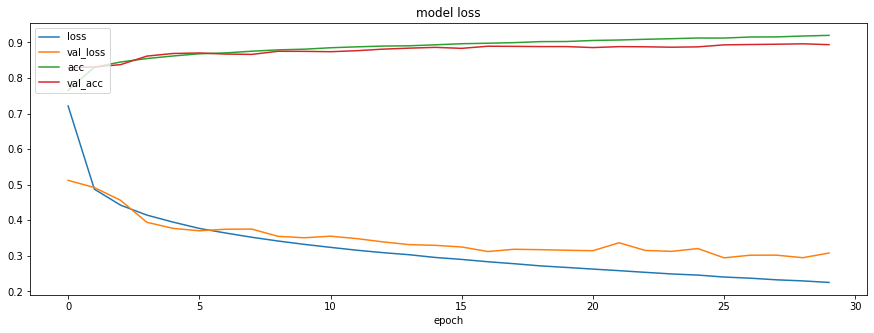

In [39]:
plt.plot(history_fashion.history['loss'], label = 'loss')
plt.plot(history_fashion.history['val_loss'], label = 'val_loss')
plt.plot(history_fashion.history['accuracy'], label = 'acc')
plt.plot(history_fashion.history['val_accuracy'], label = 'val_acc')
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss','acc','val_acc'], loc ='upper left')
plt.show()

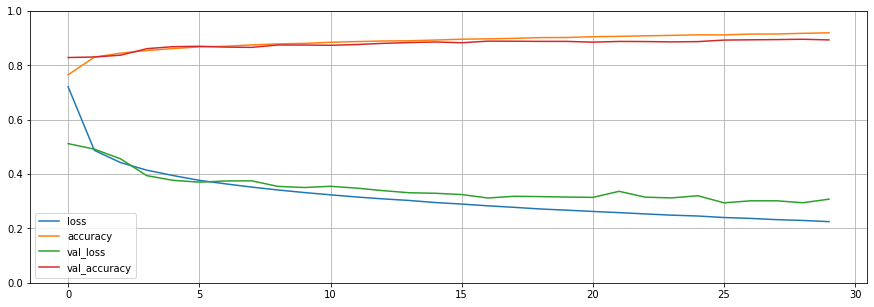

In [40]:
# También podemos obtener la representación gráfica usando el paquete pandas

import pandas as pd

pd.DataFrame(history_fashion.history).plot(figsize=(15, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

En la gráfica anterior se observa que a medida que transcurren los epochs se consigue el objetivo de bajar la función de pérdida sobre el conjunto de entrenamiento (y aumentar el rendimiento). También vemos que (aunque obviamente un poco peor), igualmente se rebaja la pérdida sobre el conjunto de validación y se aumenta el rendimiento, lo que quiere decir que no hay un sobreajuste exagerado. 

Veamos ahora el rendimiento sobre el conjunto de prueba, también es bastante bueno. Los valores obtenidos son la medida de error (loss) y las métricas que hemos usado (accuracy en este caso) sobre le conjunto de test. En este caso, el _batch_ por defecto es 32 y damos 10000 / 32 (aprox. 313) pasos.

In [41]:
test_loss, test_acc = model_fashion.evaluate(X_test_fashion, y_test_fashion)
print('\nError (loss) sobre el conjunto de test:',test_loss)
print('Rendimiento (accuracy) sobre el conjunto de test:',test_acc)

313/313 [==============================] - 2s 2ms/step - loss: 0.3354 - accuracy: 0.8811

Error (loss) sobre el conjunto de test: 0.33541223406791687
Rendimiento (accuracy) sobre el conjunto de test: 0.8810999989509583


Para finalizar, veamos la predicción (`predict`) sobre los tres primeros ejemplos del conjunto de test, y comprobemos si se ha acertado:

In [42]:
X_new_fashion = X_test_fashion[:3]
y_proba_fashion = model_fashion.predict(X_new_fashion)
y_proba_fashion.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.01, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Lo anterior son las probabilidades que se predicen para cada clase, en cada uno de los tres ejemplos. En el primer caso, la probabilidad mayor es la de la última clase (Botas), en el segundo es la clase tercera (Chaleco) y en tercero es la segunda clase (Pantalón). Podemos usar  el método `predict_classes` para ver las clases concretas que se predicen:

In [43]:
y_pred_fashion = np.argmax(model_fashion.predict(X_new_fashion),axis=-1)
y_pred_fashion

array([9, 2, 1], dtype=int64)

In [44]:
np.array(class_names)[y_pred_fashion]

array(['Botas', 'Chaleco', 'Pantalón'], dtype='<U9')

En este caso, se acierta en los tres ejemplos:

In [45]:
y_new_fashion = y_test_fashion[:3]
y_new_fashion

array([9, 2, 1], dtype=uint8)

Podemos incluso ver las imágenes, comprobando los aciertos:

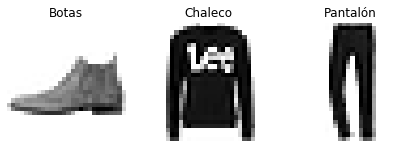

In [46]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new_fashion):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test_fashion[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

Puesto que la salida de la última capa es una distribución de probabilidad, podemos también representar la probabilidad de cada una de las categorías.

In [47]:
# Código tomado de https://www.tensorflow.org/tutorials/keras/classification

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Podemos usar ese código para representar la salida de la red. La barra azul es la probabilidad asignada por la red a la clasificación correcta. Las otras barras representan las probabilidades de otras categorías.

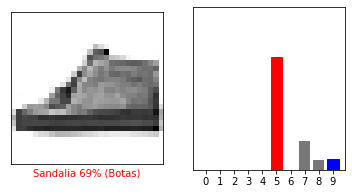

In [48]:
y_pred_fashion_test = model_fashion.predict(X_test_fashion)

# Cambia el índice para hacer pruebas
i = 107

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred_fashion_test, y_test_fashion, X_test_fashion)
plt.subplot(1,2,2)
plot_value_array(i, y_pred_fashion_test[i],  y_test_fashion)
plt.show()

Podemos representar la distribución de probabilidad asociada a otras imágenes con el siguiente código.

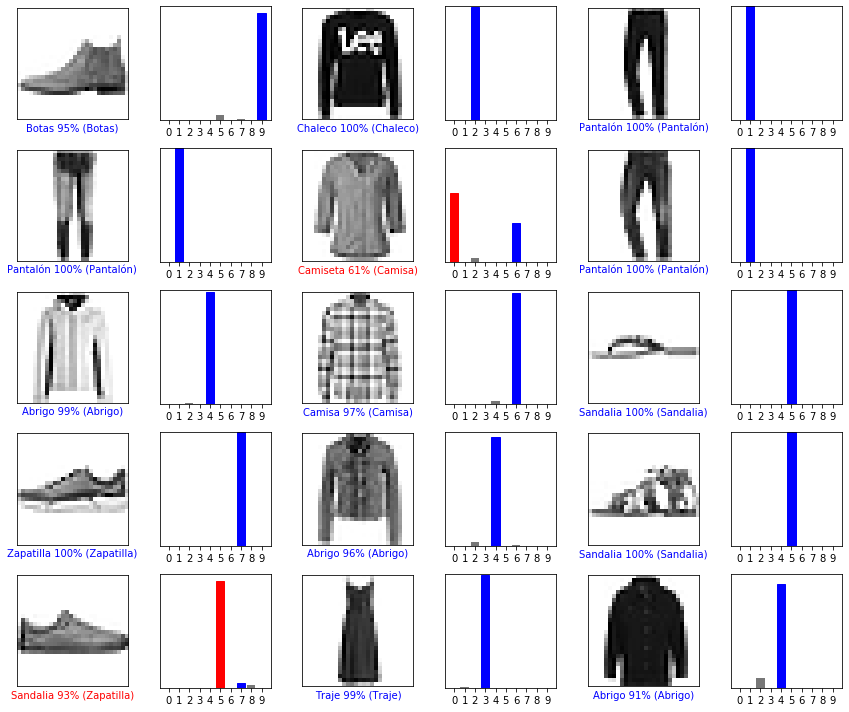

In [49]:
# Representamos la predicción correcta en azul y si es incorrecta en rojo

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
#  plot_image(i, predictions[i], test_labels, test_images)
  plot_image(i, y_pred_fashion_test, y_test_fashion, X_test_fashion)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
#  plot_value_array(i, predictions[i], test_labels)
  plot_value_array(i, y_pred_fashion_test[i],  y_test_fashion) 
plt.tight_layout()
plt.show()


# Experimento 2

En este segundo experimento vamos a basarnos en otro de los más famosos conjuntos de ejemplos, el conjunto de imágenes MNIST, formado por imágenes de dígitos escritos a mano. Puedes obtener información sobre este conjunto en http://yann.lecun.com/exdb/mnist/. Aquí seguimos un ejemplo tomado de la web de keras https://keras.io/examples/mnist_mlp/

In [50]:
# Cargamos las librerías

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [51]:
# Cargamos el conjunto MNIST.

from tensorflow.keras.datasets import mnist

In [52]:
# Cargamos el dataset con load.
# En este caso ya está separado en entrenamiento y prueba
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

In [53]:
# Usamos 60000 ejemplos para entrenar y 10000 ejemplos para el test
# x_train es un tensor formado por 60000 matrices de tamaño 28 x 28
print(X_train_mnist.shape)
print(X_test_mnist.shape)

(60000, 28, 28)
(10000, 28, 28)


In [54]:
# Obtenemos el primer ejemplo. Es una matriz (array) de 28 x 28 valores.
X_train_mnist[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [55]:
# No nos dice mucho. Obtengamos algo de información del primer ejemplo.

print('Tamaño:', X_train_mnist[0].shape)
print('Valor máximo:',np.amax(X_train_mnist[0]))
print('Valor mínimo:',np.amin(X_train_mnist[0]))

Tamaño: (28, 28)
Valor máximo: 255
Valor mínimo: 0


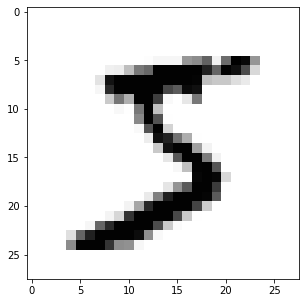

In [56]:
# Es una matriz de 28 x 28 con valores enteros entre 0 y 255
# La interpretamos como una imagen en escala de grises.
plt.imshow(X_train_mnist[0], cmap='Greys')
plt.show()

In [57]:
# Está clasificado como 5
print(y_train_mnist[0]) 

5


La etiqueta del ejemplo 3452 es 3


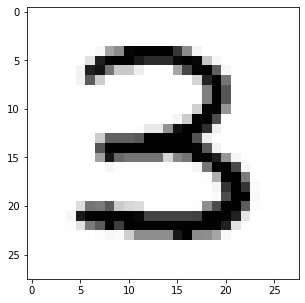

In [58]:
# Probamos con otros índices

indice_prueba = 3452
plt.imshow(X_train_mnist[indice_prueba], cmap='Greys')
print('La etiqueta del ejemplo',indice_prueba,'es',y_train_mnist[indice_prueba]) 

In [59]:
# En el Experimento 1 usábamos una primera capa Flatten para cambiar las dimensiones de los tensores. 
# Este cambio en las dimensiones también se puede hacer aparte

X_train_m_reshaped = X_train_mnist.reshape(60000, 784).astype('float32') / 255
X_test_m_reshaped = X_test_mnist.reshape(10000, 784).astype('float32') /255

print(X_train_m_reshaped.shape[0], 'train samples')
print(X_test_m_reshaped.shape[0], 'test samples')

60000 train samples
10000 test samples


In [60]:
print('Cada ejemplo es ahora un vector de longitud',X_train_m_reshaped.shape[1])

Cada ejemplo es ahora un vector de longitud 784


In [61]:
# En este experimento vamos a usar la representación one-hot para las etiquetas

num_classes= 10

y_train_m_reshaped = keras.utils.to_categorical(y_train_mnist, num_classes)
y_test_m_reshaped = keras.utils.to_categorical(y_test_mnist, num_classes)

In [62]:
# Vemos la primera etiqueta, que como hemos visto antes, corresponde al 5
y_train_m_reshaped[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [63]:
# Creamos el modelo

model_mnist = Sequential()
model_mnist.add(Dense(512, activation='relu', input_shape=(784,)))
model_mnist.add(Dense(512, activation='relu'))
model_mnist.add(Dense(num_classes, activation='softmax'))

In [64]:
# Vemos qué aspecto tiene la red
model_mnist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compilamos. en este caso usamos como medida de error la "categorical_crossentropy"
# porque estamos usando una representación "one hot" para las etiquetas.

model_mnist.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [66]:
# Entrenamos. En este caso vamos a usar como conjunto de validación el mismo conjunto que para test

mi_batch_size = 128
mis_epochs = 20

history_mnist = model_mnist.fit(X_train_m_reshaped, y_train_m_reshaped,
                    batch_size=mi_batch_size,
                    epochs=mis_epochs,
                    verbose=1,
                    validation_data=(X_test_m_reshaped, y_test_m_reshaped))

Epoch 1/20
469/469 [==============================] - 9s 18ms/step - loss: 0.2201 - accuracy: 0.9319 - val_loss: 0.1521 - val_accuracy: 0.9551
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0818 - accuracy: 0.9745 - val_loss: 0.0924 - val_accuracy: 0.9724
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0755 - val_accuracy: 0.9768
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0750 - val_accuracy: 0.9794
Epoch 5/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0986 - val_accuracy: 0.9778
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0791 - val_accuracy: 0.9812
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.0911 - val_accuracy: 0.980

In [67]:
# Podemos guardar el modelo ya entrenado como un fichero HDF5
# Esto nos permite volver a usar los pesos entrenados en otra sesión
model_mnist.save('my_model.h5') 

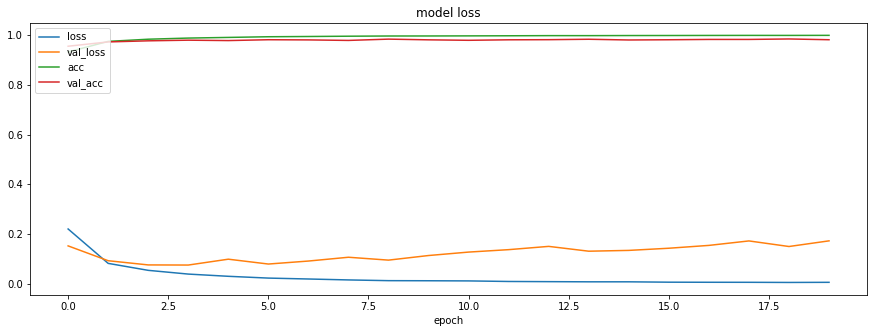

In [68]:
# Vemos cómo ha ido la evolución

plt.plot(history_mnist.history['loss'], label = 'loss')
plt.plot(history_mnist.history['val_loss'], label = 'val_loss')
plt.plot(history_mnist.history['accuracy'], label = 'acc')
plt.plot(history_mnist.history['val_accuracy'], label = 'val_acc')
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss','acc','val_acc'], loc ='upper left')
plt.show()

In [69]:
# Vemos el error y la medida de rendimiento (accuracy) obtenida
test_m_loss, test_m_acc = model_mnist.evaluate(X_test_m_reshaped, y_test_m_reshaped)
print('Test loss:',test_m_loss)
print('Test accuracy:',test_m_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1723 - accuracy: 0.9812
Test loss: 0.1723356992006302
Test accuracy: 0.9811999797821045


Nótese que son los valores obtenidos tras el último paso de entrenamiento, ya que hemos usado el conjunto de test como conjunto de validación.

In [70]:
# Podemos ver las predicciones sobre los tres primeros dígitos del conjunto de test

X_new_m = X_test_m_reshaped[:3]
y_proba_m = model_mnist.predict(X_new_m)
y_proba_m.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [71]:
# Deshaciendo el one-hot encoding, vemos las clases a las que corresponden
y_pred = np.argmax(model_mnist.predict(X_new_m), axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

In [72]:
# Comprobamos cuáles eran las etiquetas reales
y_test_mnist[:3]

array([7, 2, 1], dtype=uint8)

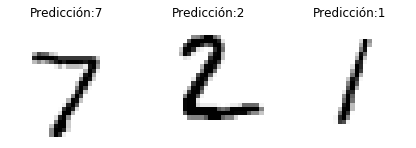

In [73]:
# Podemos representar las imágenes junto a sus predicciones

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_test_mnist[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title('Predicción:' + str(y_pred[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

También podemos considerar la matriz de confusión de este experimento

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import seaborn as sn
import pandas as pd


# Y_pred_test_classes = model_mnist.predict_classes(X_test_m_reshaped)
Y_pred_test_classes = np.argmax(model_mnist.predict(X_test_m_reshaped), axis=-1)


confusion_mtx = confusion_matrix(y_test_mnist, Y_pred_test_classes) 


df_cm = pd.DataFrame(confusion_mtx, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size


ImportError: DLL load failed: No se encontró el proceso especificado.

También puede ser interesante buscar los números en los que la clasificación no ha sido la correcta

In [76]:
y_pred_m_test_prob = model_mnist.predict(X_test_m_reshaped)

Salida de la red: [0.   0.   0.02 0.   0.   0.   0.   0.98 0.   0.  ]
Predicción: 7
Clasificación real: 2


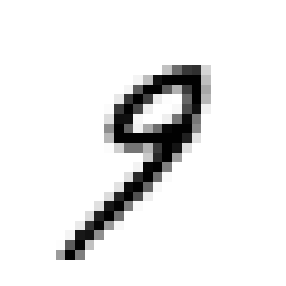

In [77]:
y_pred_m_test = np.argmax(model_mnist.predict(X_test_m_reshaped),axis=-1)

indices_m_diff = [i for i in range(len(y_test_mnist)) if y_test_mnist[i] != y_pred_m_test[i]]

# Puedes cambiar este índice para hacer pruebas
diff_i = 7

diff_j = indices_m_diff[diff_i]

print('Salida de la red:',y_pred_m_test_prob[diff_j].round(2))
print('Predicción:',y_pred_m_test[diff_j])
print('Clasificación real:',y_test_mnist[diff_j])

plt.imshow(X_train_mnist[diff_j], cmap='Greys')
plt.axis('off')
plt.show()

Para terminar este experimento, escribe un número en un lienzo de 28 x 28 píxeles. Guárdalo en un fichero con nombre 'mi_numero.jpg' y prueba a ver si la red lo clasifica correctamente.

In [78]:
from tensorflow.keras.preprocessing import image
import os

def mi_pred(file):
    cwd = os.getcwd() # cwd es el directorio actual
    mi_imagen = image.load_img(cwd + '/' + file +'.jpg',color_mode='grayscale',target_size=(28,28))    
    mi_array_aux = image.img_to_array(mi_imagen)
    mi_array = 255 - mi_array_aux
    mi_imagen_inversa = image.array_to_img(mi_array)
    mi_array_reshape = mi_array.reshape(1,784)
    pred = model_mnist.predict(mi_array_reshape)
    b = np.argmax(pred)
    print('')
    print('Predicción: ',b)
    plt.axis('off')
    plt.imshow(mi_imagen_inversa,cmap='Greys')

In [79]:
mi_pred('mi_numero')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Proyecto\\MULCIA-AP-investigation\\practica_1/mi_numero.jpg'

# Experimento 3

Tomado del libro **Deep Learning with Python** de F. Chollet

La clasificación binaria es, posiblemente, el tipo de problema con mayor número de aplicaciones en ML. En este experimento vamos a ver cómo construir un clasificador en Keras. Concretamente, construiremos una red neuronal que nos ayude a clasificar opiniones de películas como "positivas/negativas" únicamente basándonos en el contenido textual de las mismas. Será un ejemplo de lo que se conoce actualmente como **Análisis de Sentimientos**.

Usaremos uno de los datasets que proporciona el sitio [IMDB](https://www.imdb.com) (Internet Movie DataBase) formado por 50,000 opiniones altamente polarizadas (lo que simplifica la tarea de aprendizaje). Este conjunto está dividido en 50%/50% para entrenamiento/test, y en cada uno de ellos hay un 50% de opiniones de cada tipo.

Al igual que con el dataset anterior (MNIST) este dataset también viene con Keras, y además se proporciona preprocesado: por medio de un diccionario indexado, las opiniones (secuencias de palabras) se han convertido en secuencias de enteros.

In [80]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.datasets import imdb

(imdb_train_data, imdb_train_labels), (imdb_test_data, imdb_test_labels) = imdb.load_data(num_words=10000)

Como el diccionario es tremendamente grande y hay muchas palabras que se usan rara vez, nos quedaremos solo con las 10000 palabras más frecuentes (algo que conseguimos por medio del argumento num_words = 10000 en el proceso de carga).

Si quieres, puedes explorar el contenido de las variables train_data y test_data, que son listas de opiniones, donde cada opinión es una lista de enteros (codificando una secuencia de palabras). Las variables train_labels y test_labels son listas binarias, donde 0 indica que la opinión asociada es negativa y 1 que es positiva:


In [81]:
# Vemos qué aspecto tiene el primer ejemplo
print(imdb_train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [82]:
# Pues como ese, hay 25000
imdb_train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [83]:
# Las posibles clasificaciones de las frases son 0 o 1. Vemos las 5 primeras etiquetas.
imdb_train_labels[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [84]:
print('train_data tiene', len(imdb_train_data),'ejemplos')
print('cada uno de ellos con',len(imdb_train_data[0]),'valores (atributos)')

train_data tiene 25000 ejemplos
cada uno de ellos con 218 valores (atributos)


Puedes observar que los índices de las palabras almacenadas están por debajo de 10,000:

In [85]:
max([max(sequence) for sequence in imdb_train_data])

9999

Aunque no es necesario para el entrenamiento posterior, podemos construir funciones que reconstruyen las opiniones a partir de las secuencias de índices:

In [86]:
reverse_word_index = tf.keras.datasets.imdb.get_word_index(path="imdb_word_index.json")

1654784/1641221 [==============================] - 0s 0us/step


In [87]:
# word_index es un diccionario que asigna a cada palabra un índice
word_index = imdb.get_word_index()
# Lo invertimos, esto es, creamos un diccionario que a cada índice le asigne una palabra
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Decodificamos la frase. Hay que restar 3 al índice porque los índices 0, 1 y 2 están reservados para 
# "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in imdb_train_data[0]])

In [88]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Como las redes neuronales no admiten listas de enteros como entrada tenemos que añadir un preprocesado adicional para poder trabajar con ellas. Tenemos dos opciones:

* Completar las listas más cortas para que todas tengan la misma longitud y, entonces, convertirlas en tensores que alimentarán la capa de entrada de la red.
* Codificar en One-hot las listas para convertirlas en vectores de 0s y 1s. Como tenemos un máximo de 10,000 palabras en nuestro vocabulario, cada opinión se convertirá en una lista binaria de 10,000 posiciones indicando qué palabras aparecen en la opinión. En este caso, la primera capa (densa) de nuestra red se conectaría con vectores de longitud 10,000.

Optaremos por esta segunda opción. El código que permite hacer esta conversión es:

In [89]:
def vectorize_sequences(sequences, dimension=10000):
    # Primero creo results, que es una matriz llena de ceros
    # que tiene tantas filas como ejemplos haya en "sequences"
    # y 10000 columnas (tantas como palabras estoy usando)
    results = np.zeros((len(sequences), dimension))
    # para cada ejemplo que aparezca en sequences
    for i, sequence in enumerate(sequences):
        # Cambio el cero de la posición (i,sequence por un 1)
        results[i, sequence] = 1.
    return results

In [90]:
# Lo vemos con el primer ejemplo de train_data
# Comprobamos que el 1 y el 2 sí aparecen en el primer ejemplo, pero que el 0 y el 3 no

print(imdb_train_data[0])
print('\n¿Está el 0 en la lista?', 0 in imdb_train_data[0])
print('¿Está el 1 en la lista?', 1 in imdb_train_data[0])
print('¿Está el 2 en la lista?', 2 in imdb_train_data[0])
print('¿Está el 3 en la lista?', 3 in imdb_train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

¿Está el 0 en la lista? False
¿Está el 1 en la lista? True


Si ahora aplicamos vectorice_sequences al primer ejemplo de train_data vemos que en la posición 0 y 3 sigue habiendo un cero, pero que en las posiciones 1 y 2 hay un 1. Esto no es más que una forma de representar la información, pero hay que tener en cuenta que 0 significa que la palabra noa aparece y 1 que sí aparece, pero estamos perdiendo mucha información porque nos da aigual qué palabra venía delante o detrás o el número de veces que aparecía.

In [91]:
vectorize_sequences([imdb_train_data[0]])[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [92]:
# Vectorizamos el conjunto de entrenamiento
x_train_imdb = vectorize_sequences(imdb_train_data)
# Vectorizamos el conjunto de test
x_test_imdb = vectorize_sequences(imdb_test_data)

In [93]:
print('x_train tiene', len(x_train_imdb),'ejemplos')
print('cada uno de ellos con',len(x_train_imdb[0]),'valores (atributos)')

x_train tiene 25000 ejemplos
cada uno de ellos con 10000 valores (atributos)


Este es el aspecto que tienen ahora las opiniones. Nótese que sólo marcamos si la palabra aparece o no. No distinguimos si aparece una vez o varias.

In [94]:
x_train_imdb

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Para las etiquetas, lo único que hacemos es cambiar el tipo de datos y pasarlas a punto flotante.

In [95]:
y_train_imdb = np.asarray(imdb_train_labels).astype('float32')
y_test_imdb = np.asarray(imdb_test_labels).astype('float32')

Definimos la red

In [96]:
model_imdb = Sequential()
# La primer capa oculta tiene 16 neuronas. Recibe datos de la primera capa, que tiene 10000 neuronas. 
# Su función de activación es relu
model_imdb.add(Dense(16, activation='relu', input_shape=(10000,)))
# La segunda capa oculta tiene 16 neuronas y función relu. 
# No hace falta decir cuántas neuronas tiene ca capa anterior, keras ya se da cuenta
model_imdb.add(Dense(16, activation='relu'))
# La última capa tiene una única neurona con función sigmoide. Con eso la salida es un valor 
# comprendido entre 0 y 1. 
model_imdb.add(Dense(1, activation='sigmoid'))

In [97]:
model_imdb.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160016    
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Además del 'model.summary()', otra forma de visualizar la red es con la utilidad 'plot_model', que permite guardar en un fichero un esquema de la red.

In [98]:
tf.keras.utils.plot_model(model_imdb, to_file='IMDBModel_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Siguiendo el mismo patrón que vimos en el ejemplo anterior, necesitamos elegir la función de pérdida (que será minimizada) y el método de optimización (que será el que busque minimizar esa función). 

Como estamos ante un problema de clasificación binaria y la salida de nuestra red es una probabilidad (proporcionada por la sigmoide), usaremos `binary_crossentropy` como función de pérdida. No es la única opción viable, podríamos haber elegido, por ejemplo, `mean_squared_error`, pero en este caso `binary_crossentropy` es una mejor opción por estar trabajando con probabilidades. La entropía cruzada proviene del campo de **Teoría de la Información**, y mide la distancia entre distribuciones de probabilidad (en este caso, la distribución calculada por el predictor y la que representa la distribución _real_ proveniente de los datos de entrenamiento).

Como optimizador usaremos `rmsprop`, que suele ser una buena elección en casi todos los casos. Para monitorizar la evolución del aprendizaje usaremos una sola métrica, _accuracy_.

In [99]:
from tensorflow.keras import optimizers

model_imdb.compile(optimizer=optimizers.RMSprop(lr=0.001), # learning rate = 0.001
              loss='binary_crossentropy',
              metrics=['accuracy'])


Con el fin de monitorizar la métrica (_accuracy_) mientras se produce el entrenamiento necesitamos tener más datos que el modelo no use durante el proceso. Crearemos para ello un *conjunto de validación* separando otras 10,000 muestras del conjunto original. Así pues la situación queda como:

* _Conjunto de entrenamiento_: con el que intentaremos optimizar los pesos de la red para que minimice la función de pérdida. En este proceso se usa un modelo que depende de ciertos parámetros que quizás deban ser ajustados para conseguir mejorar el rendimiento.

* _Conjunto de validación_: con el que se medirá cómo de bueno es el modelo concreto que estamos entrenando (con unos parámetros fijos). Es algo así como un conjunto de test temporal. Permite ajustar estos parámetros para mejorar el rendimiento.

* _Conjunto de test_: que no se ha usado en ningún momento de las iteraciones anteriores y que permite medir de forma objetiva la bondad del modelo final obtenido.

In [100]:
x_val_imdb = x_train_imdb[:10000]
partial_x_train_imdb = x_train_imdb[10000:]

y_val_imdb = y_train_imdb[:10000]
partial_y_train_imdb = y_train_imdb[10000:]

A continuación, entrenaremos el modelo realizando 20 iteraciones (_epochs_) sobre el conjunto completo de entrenamiento, ni validación, ni test), en mini-batches de 512 muestras (es decir, cada 512 muestras analizadas, se actualizan los pesos de la red). Monitorizaremos _loss_ y _accuracy_ sobre las 10,000 muestras que dejamos en el conjunto de validación. Para ello, usamos el argumento `validation_data` de la función `fit`, que no usamos en el ejemplo anterior:

In [101]:
history_imdb = model_imdb.fit(partial_x_train_imdb,
                    partial_y_train_imdb,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_imdb, y_val_imdb))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5256 - accuracy: 0.7853 - val_loss: 0.3955 - val_accuracy: 0.8599
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3065 - accuracy: 0.9016 - val_loss: 0.3042 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2215 - accuracy: 0.9266 - val_loss: 0.2756 - val_accuracy: 0.8924
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1704 - accuracy: 0.9448 - val_loss: 0.2724 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1414 - accuracy: 0.9537 - val_loss: 0.2916 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1118 - accuracy: 0.9645 - val_loss: 0.2925 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0944 - accuracy: 0.9707 - val_loss: 0.3185 - val_accuracy: 0.8826
Epoch 8/20
30

Vemos cómo ha ido el entrenamiento.

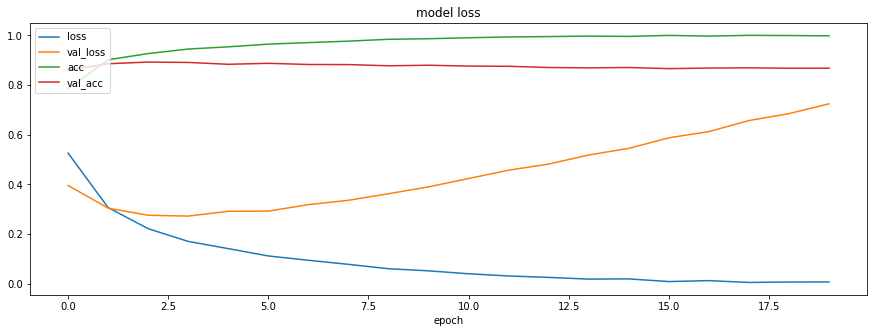

In [102]:
plt.plot(history_imdb.history['loss'], label = 'loss')
plt.plot(history_imdb.history['val_loss'], label = 'val_loss')
plt.plot(history_imdb.history['accuracy'], label = 'acc')
plt.plot(history_imdb.history['val_accuracy'], label = 'val_acc')
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss','acc','val_acc'], loc ='upper left')
plt.show()

Estas gráficas muestras que la _pérdida_ de entrenamiento decrece en cada epoch, y que el _accuracy_ en entrenamiento crece, algo que indica que el procedimiento de optimización está funcionando adecuadamente (sobre todo respecto a la función de pérdida). Pero en este caso observamos que no ocurre lo mismo con la validación, que empiezan a empeorar a partir de la epoch 4. Estamos ante un claro caso de *overfitting*: tras unos pocos pasos el sistema se sobreajusta a los datos de entrenamiento, y aprende una representación que es específica a estos datos y que no puede generalizarse a otros datos.

En este caso, para prevenir el overfitting podríamos parar el entrenamiento tras las 3 primeras iteraciones. Más adelante veremos algunas otras técnicas para mitigar este efecto, pero por ahora nos contentaremos con este procedimiento que, aún lejos de ser el mejor, evita este problema ahora mismo.

Vamos a entrenar una nueva red desde el principio pero solo durante 4 epochs y después evaluaremos el modelo sobre los datos de test (observa que estos datos no los hemos usado en ningún momento hasta ahora):

In [103]:
model_imdb_2 = Sequential()
model_imdb_2.add(Dense(16, activation='relu', input_shape=(10000,)))
model_imdb_2.add(Dense(16, activation='relu'))
model_imdb_2.add(Dense(1, activation='sigmoid'))

model_imdb_2.compile(optimizer=optimizers.RMSprop(lr=0.001), # learning rate = 0.001
              loss='binary_crossentropy',
              metrics=['accuracy'])


model_imdb_2.fit(partial_x_train_imdb,
                    partial_y_train_imdb,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val_imdb, y_val_imdb))

imdb_2_test_loss, imdb_2_test_acc = model_imdb_2.evaluate(x_test_imdb, y_test_imdb)

print('\nError (loss) sobre el conjunto de test:',imdb_2_test_loss)
print('Rendimiento (accuracy) sobre el conjunto de test:',imdb_2_test_acc)

Epoch 1/4
30/30 [==============================] - 2s 35ms/step - loss: 0.5056 - accuracy: 0.7825 - val_loss: 0.3901 - val_accuracy: 0.8534
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.2989 - accuracy: 0.9011 - val_loss: 0.3076 - val_accuracy: 0.8818
Epoch 3/4
30/30 [==============================] - 1s 22ms/step - loss: 0.2181 - accuracy: 0.9268 - val_loss: 0.2808 - val_accuracy: 0.8893
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2931 - accuracy: 0.8819

Error (loss) sobre el conjunto de test: 0.2930765151977539
Rendimiento (accuracy) sobre el conjunto de test: 0.881879985332489


Vemos que sobre el conjunto de prueba hemos obtenido una medida de rendimiento _(accuracy)_ de más del 80%, que está muy bien para una red tan simple.

Podemos obtener los resultados obtenidos sobre los 10 primeros elementos de test. Al ser clasificación binaria y usar la función sigmoide, podemos interpretar los resultados como la probabilidad de obtener la clasificación 1. Por tanto, en la siguinete tabla tenemos:
* La primer columna representa la probabilidad que predice la red de que el ejemplo tenga clasificación 1
* La segunda columna es la etiqueta real del ejemplo

In [104]:
list(zip(model_imdb_2.predict(x_test_imdb)[:10].reshape(-1).round(5),y_test_imdb[:10]))

[(0.2633, 0.0),
 (0.99893, 1.0),
 (0.90167, 1.0),
 (0.69361, 0.0),
 (0.90466, 1.0),
 (0.82215, 1.0),
 (0.99721, 1.0),
 (0.03848, 0.0),
 (0.9442, 0.0),
 (0.98622, 1.0)]

# Experimento 4

Tomado del libro **Generative Deep Learning** de David Foster

En este último experimento vamos a usar el API funcional de keras. Tomamos como dataset el conjunto CIFAR10. Este conjunto consta de 60000 imágenes en color de 32x32 píxeles divididas en 10 clases, con 6000 imágenes por clase. Hay 50000 imágenes en el conjunto de entrenamiento y 10000 en el de test. Puedes saber más sobre este conjunto de entrenamiento en https://www.cs.toronto.edu/~kriz/cifar.html

In [105]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1076)

Veamos la dimensión de los datos

In [106]:
print(x_train_cifar.shape)

NameError: name 'x_train_cifar' is not defined

Son 50000 imágenenes de 32 x 32 píxeles y 3 canales (RGB)

In [107]:
print(y_train_cifar.shape)

NameError: name 'y_train_cifar' is not defined

Hay 50000 etiquetas, cada una de ellas es un número de 0 a 9. Procesamos los datos de entrada. En primer lugar, los números que representan la intensidad de color los pasamos de 0 a 255 al rango de 0 a 1 y las etiquetas las representamos con el one-hot encoding.

In [108]:
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

NUM_CLASSES = 10

y_train_cifar = to_categorical(y_train_cifar, NUM_CLASSES)
y_test_cifar = to_categorical(y_test_cifar, NUM_CLASSES)

NameError: name 'x_train_cifar' is not defined

Podemos pedirle que nos de el valor de la intensidad de verde (canal G de RGB) del píxel (12,13) de la imagen 540.

In [ ]:
x_train_cifar[540, 12, 13, 1] 

Ahora creamos la red. Nótese el cambio de sintaxis. Guardamos dentro de la variable x la red parcialmente construida.

In [ ]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model

input_layer = Input((32,32,3))

x = Flatten()(input_layer)
x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model_cifar = Model(input_layer, output_layer)

# Con la API Secuencial tendríamos
#
# model_cifar = Sequential()
# model_cifar.add(Flatten(input_shape=[32, 32,3]))
# model_fashion.add(keras.layers.Dense(200, activation="relu"))
# model_fashion.add(keras.layers.Dense(150, activation="relu"))
# model_fashion.add(keras.layers.Dense(NUM_CLASSES, activation="softmax"))

Compilamos. Usamos el optimizador Adam.

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.0005) # learning rate de 0.0005
model_cifar.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Entrenamos la red. En este caso no hemos usado conjunto de validación.

In [ ]:
history_cifar = model_cifar.fit(x_train_cifar
          , y_train_cifar
          , batch_size=32
          , epochs=10
          , shuffle=True)

Vemos cómo ha ido el entrenamiento

In [ ]:
plt.plot(history_cifar.history['loss'], label = 'loss')
plt.plot(history_cifar.history['accuracy'], label = 'acc')
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc ='upper left')
plt.show()

Evaluamos el modelo sobre el conjunto de test

In [ ]:
test_cifar_loss, test_cifar_acc = model_cifar.evaluate(x_test_cifar, y_test_cifar)

print('\nError (loss) sobre el conjunto de test:',test_cifar_loss)
print('Rendimiento (accuracy) sobre el conjunto de test:',test_cifar_acc)

Nos ha salido una medida de rendimiento cercana al 50%. No está mal, teniendo en cuenta que la red es muy simple y si eligiéramos al azar tendríamos una tasa de éxito del 10%. Podemos ver el resultado de algunas de las predicciones, dando contenido semántico a las etiquetas.

In [ ]:
CLASSES = np.array(['aeroplano', 'automóvil', 'pájaro', 'gato', 'ciervo', 
                    'perro', 'rana', 'caballo', 'barco', 'camión'])


preds_cifar = model_cifar.predict(x_test_cifar)
preds_single_cifar = CLASSES[np.argmax(preds_cifar, axis = -1)]
actual_single_cifar = CLASSES[np.argmax(y_test_cifar, axis = -1)]

print('Predicción:',preds_single_cifar[:5])
print('Etiqueta real:', actual_single_cifar[:5])

Pero queda mejor si vemos las imágenes del conjunto de test, su etiqueta y el resultado de la predicción.

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test_cifar)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test_cifar[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single_cifar[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single_cifar[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)